In [1]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Komoran
from konlpy.utils import pprint
kkma=Kkma()
twt=Okt()
kmr=Komoran()
import pandas as pd

In [2]:
import openpyxl
pure= pd.read_excel("아로나민골드pure.xlsx", header=None, parse_cols='B:C')

In [12]:
kkma_list_unique = []
kkma_list_all = []
cloudlst = []

for row in pure.iterrows():
    data=kmr.pos(row[1].to_string())
    i=0
    while True:
        if data[i][0]=='.com' or data[i][0]=='.me' or data[i][0]=='안녕하세요' or data[i][0]=='속눈썹':
            data[i]=(',', 'Punctuation')
        elif data[i][0]=='양제':
            data[i]=('영양제', 'NNG')
        elif data[i][0]=='유산' and data[i+1][0]=='균':
            data[i]=('유산균', 'NNG')
            data[i+1]=(',', 'Punctuation')
        elif data[i][0]=='아이' and data[i+1][0]=='허브':
            data[i]=('아이허브', 'NNG')
            data[i+1]=(',', 'Punctuation')
        elif data[i][0]=='아로' and data[i+1][0]=='나' and data[i+2][0]=='민':
            data[i]=('아로나민', 'NNG')
            data[i+1]=(',', 'Punctuation')
            data[i+2]=(',', 'Punctuation')
        elif data[i][0]=='씨' and data[i+1][0]=='플러스':
            data[i]=('씨플러스','NNG')
            data[i+1]=(',', 'Punctuation')
        elif data[i][0]=='임' and data[i+1][0]=='팩' and data[i+2][0]=='타' and data[i+3][0]=='민':
            data[i]=('임팩타민', 'NNG')
            data[i+1]=(',', 'Punctuation')
            data[i+2]=(',', 'Punctuation')
            data[i+3]=(',', 'Punctuation')
        elif data[i][0]=='센트' and data[i+1][0]=='룸':
            data[i]=('센트룸', 'NNG')
            data[i+1]=(',', 'Punctuation')
        elif data[i][0]=='밀크' and data[i+1][0]=='씨' and data[i+2][0]=='슬':
            data[i]=('밀크씨슬', 'NNG')
            data[i+1]=(',', 'Punctuation')
            data[i+2]=(',', 'Punctuation')
        elif data[i][0]=='루' and data[i+1][0]=='테이' and data[i+2][0]=='ㄴ':
            data[i]=('루테인', 'NNG')
            data[i+1]=(',', 'Punctuation')
            data[i+2]=(',', 'Punctuation')
        if i==len(data)-2:
            break
        else:
            i=i+1
    #kmr품사태깅임
    nvadj= [(word,part) for word,part in data if  part=='NNG' or part=='NNP' or part=='NP' or part=='VV' or part=='VA' or part=='VCP' or part=='VCN'or part=='MM'or part=='NF'or part=='NV' or part=='NNB']
    nvadj2= [word for word,part in data if  part=='NNG' or part=='NNP'or part=='VV' or part=='VA' or part=='MM'or part=='NF'or part=='NV' or part=='NNB']
    kkma_list_all.append(nvadj)
    kkma_list_unique.append(list(set(nvadj)))
    cloudlst.append(nvadj2)

In [13]:
import nltk

tokenlst_all=[]
tokenlst_unique=[]

for i in kkma_list_all:
    for j in i:
        tokenlst_all.append(j)
        
for i in kkma_list_unique:
    for j in i:
        tokenlst_unique.append(j)
        
nltk_text_all = nltk.Text(tokenlst_all)
tflst = list(nltk_text_all.vocab().items())

nltk_text_unique = nltk.Text(tokenlst_unique)
dflst=list(nltk_text_unique.vocab().items())

In [14]:
import numpy as np
tffrm=pd.DataFrame(list(tflst),columns=['token','tf'])
dffrm=pd.DataFrame(list(dflst), columns=['token','df'])
frm=tffrm.merge(dffrm,how='left',on='token')
frm['tfidf']=frm['tf'].div(frm.df)
frm['tfidf_fl']=round(frm['tfidf'])

In [15]:
#gt1=frm['tf']>0.01*sum(frm.tf)
gt2=frm['df']>0.03*len(pure)
gtfrm=frm[gt2]

In [16]:
result=gtfrm.sort_values(['tfidf_fl','tf'],ascending=[False,False])
result[0:50]
result.to_excel('빈도표_골드.xlsx')

,token,tf,df,tfidf,tfidf_fl
41,"(날, NNG)",134,86,1.558140,2.0
7,"(골드, NNP)",2014,1557,1.293513,1.0
4,"(아로나민, NNG)",2000,1505,1.328904,1.0
90,"(이, VCP)",740,602,1.229236,1.0
2,"(비타민, NNP)",620,463,1.339093,1.0
40,"(먹, VV)",587,455,1.290110,1.0
100,"(피로, NNP)",489,374,1.307487,1.0
33,"(민, NNP)",383,355,1.078873,1.0
119,"(하, VV)",362,307,1.179153,1.0
47,"(영양제, NNG)",329,277,1.187726,1.0


In [11]:
import matplotlib.pyplot as plt
import platform
from wordcloud import WordCloud

In [12]:
cloudlst2=[]
for i in cloudlst:
    for j in i:
        cloudlst2.append(j)
cloudnltk= nltk.Text(cloudlst2)

In [13]:
cloudtext=cloudnltk.vocab().most_common(100)
tmptext=dict(cloudtext)

In [20]:
del tmptext['로나']
del tmptext['아로']
del tmptext['나민']

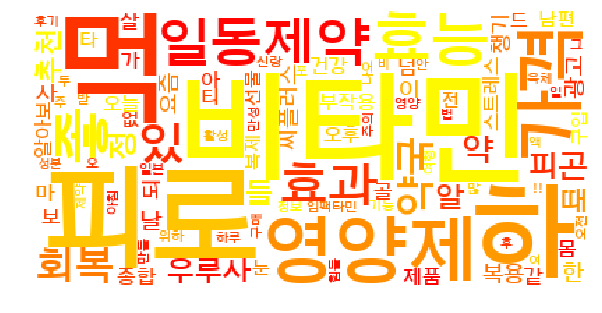

In [21]:
wordcloud=WordCloud(font_path='아리따돋움SemiBold.ttf', relative_scaling=0.3, colormap='autumn', background_color='white').generate_from_frequencies(tmptext)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
wordcloud.to_file('아로나민골드빈도.png')